In [1]:
# Regression using Boston Housing Data

Peter Rigii

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

library(mlbench)
data(BostonHousing)

## Load data

In [3]:
# Import library
import pandas as pd 

In [4]:
# Read and load data
BostonHousing = pd.read_csv('BostonHousing.csv')
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Split Dataset into X and Y variables

In [5]:
Y = BostonHousing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [7]:
# Drop the medv column (dependent var) to remain with the indpt vars
X = BostonHousing.drop('medv', axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## Splitting into train and test data

In [11]:
# Import library
from sklearn.model_selection import train_test_split

In [12]:
# Perform 80/20 split on the data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
# Data dimensions
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((404, 13), (404,), (102, 13), (102,))

## Linear Regression Model

In [21]:
# Import libraries
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [16]:
# Build linear regression
model = linear_model.LinearRegression()


In [18]:

# Build training model
model.fit(X_train, Y_train)


LinearRegression()

In [19]:
# Apply trained model to make prediction
Y_pred = model.predict(X_test)

## Prediction results

In [33]:
# Print performance model
print('Coefficients:\n', model.coef_)
print('Intercept:\n', model.intercept_)
print('Mean Squared Error (MSE):\n %.2f'% mean_squared_error(Y_test, Y_pred))
print('Coefficient of Determination (R^2):\n %.2f'% r2_score(Y_test, Y_pred))

Coefficients:
 [-9.75605739e-02  4.88674794e-02  4.17628790e-02  2.46444877e+00
 -1.42626847e+01  4.47268737e+00 -2.24662274e-03 -1.39073996e+00
  2.85902908e-01 -1.27717156e-02 -8.21855042e-01  9.75809392e-03
 -5.36273527e-01]
Intercept:
 27.89899928850579
Mean Squared Error (MSE):
 30.31
Coefficient of Determination (R^2):
 0.65


## Scatterplots


In [34]:
# Import visualisation lib seaborn
import seaborn as sns

<Axes: xlabel='medv'>

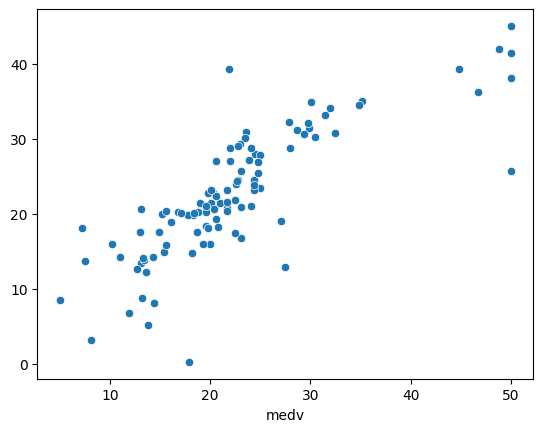

In [38]:
# Make scatterplot
sns.scatterplot(x = Y_test, y = Y_pred)

<Axes: xlabel='medv'>

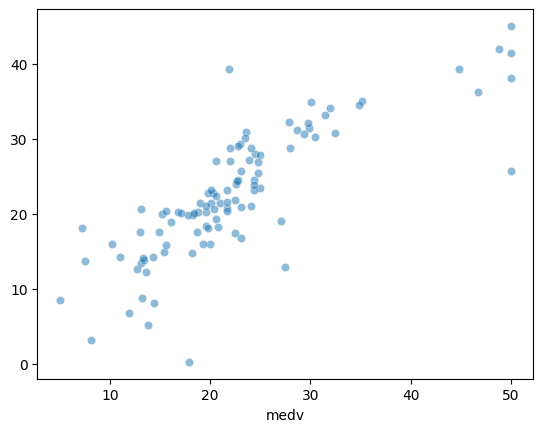

In [39]:
# Change opacity and markers

sns.scatterplot(x = Y_test, y = Y_pred, marker = 'o', alpha = 0.5)
